In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_custom_conv_3_VGG_DO(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=3, filters=64, strides=1, padding='same', 
                      input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv1D (kernel_size=3, filters=64, strides=1, padding='same'))
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=3, filters=64*(2**int((i+1)/4)), strides=1, 
                          padding='same'))
        model.add(Activation('relu'))
        model.add(Conv1D (kernel_size=3, filters=64*(2**int((i+1)/4)), strides=1, 
                          padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(1, 14):
    model = build_1d_cnn_custom_conv_3_VGG_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         256       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16000, 64)         12352     
_________________________________________________________________
activation_1 (Activation)    (None, 16000, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024000)           0         
_________________________________________________________________
dropout (Dropout)    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 16000, 64)         256       
_________________________________________________________________
activation_20 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 16000, 64)         12352     
_________________________________________________________________
activation_21 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 16000, 64)         12352     
_________________________________________________________________
activation_22 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 16000, 64)         12352     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 16000, 64)         256       
_________________________________________________________________
activation_42 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 16000, 64)         12352     
_________________________________________________________________
activation_43 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 16000, 64)         12352     
_________________________________________________________________
activation_44 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 16000, 64)         12352     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 16000, 64)         256       
_________________________________________________________________
activation_72 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 16000, 64)         12352     
_________________________________________________________________
activation_73 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 16000, 64)         12352     
_________________________________________________________________
activation_74 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 16000, 64)         12352     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_110 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_110 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_111 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_112 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 16000, 64)         12352     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_156 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_156 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_157 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_157 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_158 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_158 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_159 (Conv1D)          (None, 16000, 64)         12352     
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2398 - acc: 0.2848
Epoch 00001: val_loss improved from inf to 1.96867, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_3_conv_checkpoint/001-1.9687.hdf5
36805/36805 [==============================] - 92s 3ms/sample - loss: 2.2397 - acc: 0.2848 - val_loss: 1.9687 - val_acc: 0.3564
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7846 - acc: 0.4557
Epoch 00002: val_loss improved from 1.96867 to 1.65423, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_3_conv_checkpoint/002-1.6542.hdf5
36805/36805 [==============================] - 90s 2ms/sample - loss: 1.7845 - acc: 0.4557 - val_loss: 1.6542 - val_acc: 0.5038
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5133 - acc: 0.5477
Epoch 00003: val_loss improved from 1.65423 to 

36800/36805 [============================>.] - ETA: 0s - loss: 0.0638 - acc: 0.9848
Epoch 00028: val_loss did not improve from 1.53850
36805/36805 [==============================] - 89s 2ms/sample - loss: 0.0638 - acc: 0.9848 - val_loss: 3.3138 - val_acc: 0.5367
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0580 - acc: 0.9870
Epoch 00029: val_loss did not improve from 1.53850
36805/36805 [==============================] - 89s 2ms/sample - loss: 0.0580 - acc: 0.9870 - val_loss: 3.2559 - val_acc: 0.5460
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0612 - acc: 0.9856
Epoch 00030: val_loss did not improve from 1.53850
36805/36805 [==============================] - 89s 2ms/sample - loss: 0.0612 - acc: 0.9856 - val_loss: 3.3870 - val_acc: 0.5486
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0595 - acc: 0.9864
Epoch 00031: val_loss did not improve from 1.53850
36805/36805 [========================

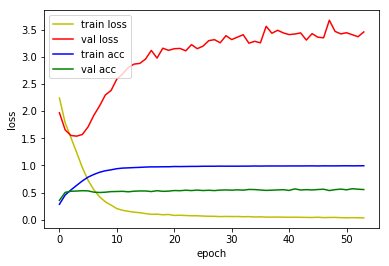

4815/4815 [==============================] - 4s 933us/sample - loss: 1.6931 - acc: 0.4916
Loss: 1.6931262289376026 Accuracy: 0.49158877

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2054 - acc: 0.3004
Epoch 00001: val_loss improved from inf to 1.77225, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_4_conv_checkpoint/001-1.7722.hdf5
36805/36805 [==============================] - 99s 3ms/sample - loss: 2.2053 - acc: 0.3004 - val_loss: 1.7722 - val_acc: 0.4493
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5834 - acc: 0.5095
Epoch 00002: val_loss improved from 1.77225 to 1.45734, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_4_conv_checkpoint/002-1.4573.hdf5
36805/36805 [==============================] - 97s 3ms/sample - loss: 1.5834 - acc: 0.5095 - val_loss: 1.4573 - val_acc: 0.5367
Epoch 3/500
36800/36805 [============================>

36800/36805 [============================>.] - ETA: 0s - loss: 0.0714 - acc: 0.9817
Epoch 00028: val_loss did not improve from 1.29775
36805/36805 [==============================] - 96s 3ms/sample - loss: 0.0713 - acc: 0.9817 - val_loss: 2.3382 - val_acc: 0.6401
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0626 - acc: 0.9847
Epoch 00029: val_loss did not improve from 1.29775
36805/36805 [==============================] - 96s 3ms/sample - loss: 0.0626 - acc: 0.9847 - val_loss: 2.3842 - val_acc: 0.6357
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0638 - acc: 0.9845
Epoch 00030: val_loss did not improve from 1.29775
36805/36805 [==============================] - 96s 3ms/sample - loss: 0.0638 - acc: 0.9845 - val_loss: 2.4535 - val_acc: 0.6394
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0615 - acc: 0.9847
Epoch 00031: val_loss did not improve from 1.29775
36805/36805 [========================

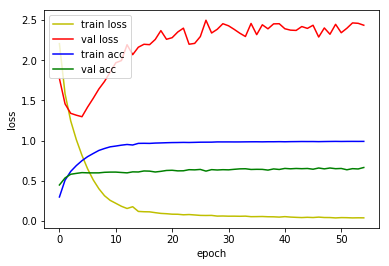

4815/4815 [==============================] - 5s 1ms/sample - loss: 1.3789 - acc: 0.5786
Loss: 1.3788966798584286 Accuracy: 0.5786085

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2220 - acc: 0.2878
Epoch 00001: val_loss improved from inf to 1.71748, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_5_conv_checkpoint/001-1.7175.hdf5
36805/36805 [==============================] - 109s 3ms/sample - loss: 2.2219 - acc: 0.2878 - val_loss: 1.7175 - val_acc: 0.4570
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5387 - acc: 0.5159
Epoch 00002: val_loss improved from 1.71748 to 1.32899, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_5_conv_checkpoint/002-1.3290.hdf5
36805/36805 [==============================] - 106s 3ms/sample - loss: 1.5387 - acc: 0.5159 - val_loss: 1.3290 - val_acc: 0.5819
Epoch 3/500
36800/36805 [============================>.

Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0541 - acc: 0.9864
Epoch 00028: val_loss did not improve from 0.97498
36805/36805 [==============================] - 105s 3ms/sample - loss: 0.0541 - acc: 0.9864 - val_loss: 1.5507 - val_acc: 0.7459
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9874
Epoch 00029: val_loss did not improve from 0.97498
36805/36805 [==============================] - 106s 3ms/sample - loss: 0.0481 - acc: 0.9874 - val_loss: 1.6789 - val_acc: 0.7438
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0540 - acc: 0.9857
Epoch 00030: val_loss did not improve from 0.97498
36805/36805 [==============================] - 105s 3ms/sample - loss: 0.0540 - acc: 0.9857 - val_loss: 1.6261 - val_acc: 0.7375
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0482 - acc: 0.9877
Epoch 00031: val_loss did not improve from 0.97498
36805/36805 [========

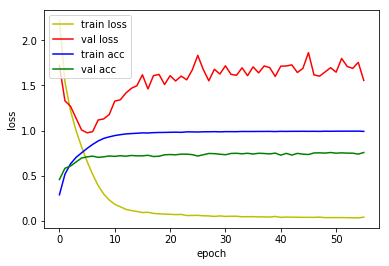

4815/4815 [==============================] - 5s 1ms/sample - loss: 1.0985 - acc: 0.6766
Loss: 1.0985290856623824 Accuracy: 0.6766355

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.3425 - acc: 0.2413
Epoch 00001: val_loss improved from inf to 1.95947, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_6_conv_checkpoint/001-1.9595.hdf5
36805/36805 [==============================] - 117s 3ms/sample - loss: 2.3424 - acc: 0.2414 - val_loss: 1.9595 - val_acc: 0.3611
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7210 - acc: 0.4505
Epoch 00002: val_loss improved from 1.95947 to 1.51117, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_6_conv_checkpoint/002-1.5112.hdf5
36805/36805 [==============================] - 111s 3ms/sample - loss: 1.7209 - acc: 0.4506 - val_loss: 1.5112 - val_acc: 0.5164
Epoch 3/500
36800/36805 [============================>.

Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1102 - acc: 0.9674
Epoch 00027: val_loss did not improve from 0.89542
36805/36805 [==============================] - 111s 3ms/sample - loss: 0.1102 - acc: 0.9674 - val_loss: 1.3769 - val_acc: 0.7456
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0948 - acc: 0.9727
Epoch 00028: val_loss did not improve from 0.89542
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.0949 - acc: 0.9727 - val_loss: 1.3492 - val_acc: 0.7536
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0899 - acc: 0.9729
Epoch 00029: val_loss did not improve from 0.89542
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.0899 - acc: 0.9729 - val_loss: 1.3960 - val_acc: 0.7473
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0839 - acc: 0.9752
Epoch 00030: val_loss did not improve from 0.89542
36805/36805 [========

Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0532 - acc: 0.9871
Epoch 00057: val_loss did not improve from 0.89542
36805/36805 [==============================] - 111s 3ms/sample - loss: 0.0532 - acc: 0.9871 - val_loss: 1.3897 - val_acc: 0.7768
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0513 - acc: 0.9868
Epoch 00058: val_loss did not improve from 0.89542
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.0513 - acc: 0.9868 - val_loss: 1.4773 - val_acc: 0.7626
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9862
Epoch 00059: val_loss did not improve from 0.89542
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.0550 - acc: 0.9863 - val_loss: 1.3644 - val_acc: 0.7734

1D_CNN_custom_conv_3_VGG_pool_2_DO_6_conv Model


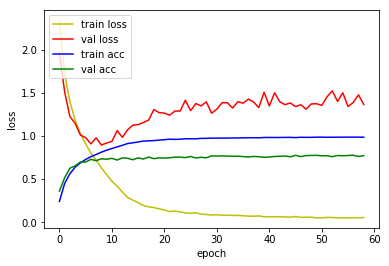

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.9917 - acc: 0.7043
Loss: 0.9917499873001875 Accuracy: 0.70425755

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2737 - acc: 0.2551
Epoch 00001: val_loss improved from inf to 1.55193, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_7_conv_checkpoint/001-1.5519.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 2.2735 - acc: 0.2551 - val_loss: 1.5519 - val_acc: 0.4833
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4234 - acc: 0.5455
Epoch 00002: val_loss improved from 1.55193 to 1.29604, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_7_conv_checkpoint/002-1.2960.hdf5
36805/36805 [==============================] - 114s 3ms/sample - loss: 1.4233 - acc: 0.5455 - val_loss: 1.2960 - val_acc: 0.5935
Epoch 3/500
36800/36805 [============================>

36800/36805 [============================>.] - ETA: 0s - loss: 0.1036 - acc: 0.9683
Epoch 00025: val_loss did not improve from 0.59273
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.1036 - acc: 0.9683 - val_loss: 0.7791 - val_acc: 0.8344
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1038 - acc: 0.9686
Epoch 00026: val_loss did not improve from 0.59273
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.1038 - acc: 0.9686 - val_loss: 0.8150 - val_acc: 0.8512
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0958 - acc: 0.9710
Epoch 00027: val_loss did not improve from 0.59273
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0958 - acc: 0.9710 - val_loss: 0.7748 - val_acc: 0.8341
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0961 - acc: 0.9722
Epoch 00028: val_loss did not improve from 0.59273
36805/36805 [=====================

Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0482 - acc: 0.9870
Epoch 00055: val_loss did not improve from 0.59273
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0482 - acc: 0.9870 - val_loss: 0.7088 - val_acc: 0.8689
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.9882
Epoch 00056: val_loss did not improve from 0.59273
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0431 - acc: 0.9882 - val_loss: 0.7401 - val_acc: 0.8747
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0509 - acc: 0.9856
Epoch 00057: val_loss did not improve from 0.59273
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0509 - acc: 0.9856 - val_loss: 0.7582 - val_acc: 0.8665
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0443 - acc: 0.9880
Epoch 00058: val_loss did not improve from 0.59273
36805/36805 [========

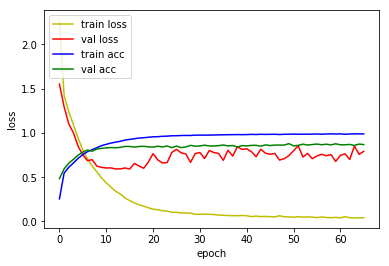

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.6946 - acc: 0.8177
Loss: 0.6946397333749235 Accuracy: 0.8176532

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.3730 - acc: 0.2145
Epoch 00001: val_loss improved from inf to 1.67105, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_8_conv_checkpoint/001-1.6710.hdf5
36805/36805 [==============================] - 126s 3ms/sample - loss: 2.3728 - acc: 0.2145 - val_loss: 1.6710 - val_acc: 0.4647
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5193 - acc: 0.5088
Epoch 00002: val_loss improved from 1.67105 to 1.25256, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_8_conv_checkpoint/002-1.2526.hdf5
36805/36805 [==============================] - 116s 3ms/sample - loss: 1.5192 - acc: 0.5088 - val_loss: 1.2526 - val_acc: 0.6056
Epoch 3/500
36800/36805 [============================>.

36800/36805 [============================>.] - ETA: 0s - loss: 0.1662 - acc: 0.9489
Epoch 00024: val_loss did not improve from 0.37764
36805/36805 [==============================] - 116s 3ms/sample - loss: 0.1663 - acc: 0.9489 - val_loss: 0.4423 - val_acc: 0.8942
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1622 - acc: 0.9497
Epoch 00025: val_loss did not improve from 0.37764
36805/36805 [==============================] - 116s 3ms/sample - loss: 0.1622 - acc: 0.9497 - val_loss: 0.4205 - val_acc: 0.8935
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1467 - acc: 0.9539
Epoch 00026: val_loss did not improve from 0.37764
36805/36805 [==============================] - 116s 3ms/sample - loss: 0.1467 - acc: 0.9539 - val_loss: 0.4684 - val_acc: 0.8859
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1449 - acc: 0.9546
Epoch 00027: val_loss did not improve from 0.37764
36805/36805 [=====================

Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0615 - acc: 0.9807
Epoch 00054: val_loss did not improve from 0.37764
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0615 - acc: 0.9807 - val_loss: 0.4456 - val_acc: 0.9133
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9832
Epoch 00055: val_loss did not improve from 0.37764
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0536 - acc: 0.9832 - val_loss: 0.4682 - val_acc: 0.9119
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0555 - acc: 0.9820
Epoch 00056: val_loss did not improve from 0.37764
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0555 - acc: 0.9820 - val_loss: 0.4849 - val_acc: 0.9061
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9805
Epoch 00057: val_loss did not improve from 0.37764
36805/36805 [========

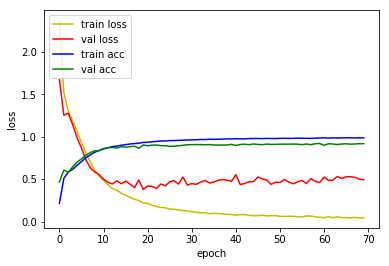

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.4438 - acc: 0.8756
Loss: 0.44378786629234146 Accuracy: 0.8755971

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.3772 - acc: 0.2058
Epoch 00001: val_loss improved from inf to 1.68807, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_9_conv_checkpoint/001-1.6881.hdf5
36805/36805 [==============================] - 132s 4ms/sample - loss: 2.3771 - acc: 0.2058 - val_loss: 1.6881 - val_acc: 0.4631
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4522 - acc: 0.5259
Epoch 00002: val_loss improved from 1.68807 to 1.22575, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_9_conv_checkpoint/002-1.2258.hdf5
36805/36805 [==============================] - 119s 3ms/sample - loss: 1.4521 - acc: 0.5259 - val_loss: 1.2258 - val_acc: 0.6205
Epoch 3/500
36800/36805 [============================>

36800/36805 [============================>.] - ETA: 0s - loss: 0.1234 - acc: 0.9604
Epoch 00024: val_loss did not improve from 0.25415
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.1234 - acc: 0.9604 - val_loss: 0.2969 - val_acc: 0.9290
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9629
Epoch 00025: val_loss did not improve from 0.25415
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.1174 - acc: 0.9629 - val_loss: 0.2618 - val_acc: 0.9355
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1113 - acc: 0.9639
Epoch 00026: val_loss did not improve from 0.25415
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.1113 - acc: 0.9639 - val_loss: 0.2963 - val_acc: 0.9324
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9664
Epoch 00027: val_loss did not improve from 0.25415
36805/36805 [=====================

Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0376 - acc: 0.9879
Epoch 00054: val_loss did not improve from 0.25415
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0376 - acc: 0.9879 - val_loss: 0.2922 - val_acc: 0.9429
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0324 - acc: 0.9898
Epoch 00055: val_loss did not improve from 0.25415
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0324 - acc: 0.9898 - val_loss: 0.3197 - val_acc: 0.9359
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0389 - acc: 0.9879
Epoch 00056: val_loss did not improve from 0.25415
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0389 - acc: 0.9879 - val_loss: 0.3717 - val_acc: 0.9350
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0354 - acc: 0.9880
Epoch 00057: val_loss did not improve from 0.25415
36805/36805 [========

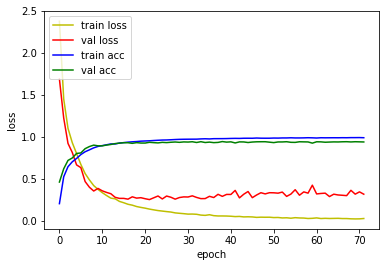

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.2968 - acc: 0.9119
Loss: 0.29676123994904513 Accuracy: 0.9119418

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4760 - acc: 0.1814
Epoch 00001: val_loss improved from inf to 1.79546, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_10_conv_checkpoint/001-1.7955.hdf5
36805/36805 [==============================] - 138s 4ms/sample - loss: 2.4761 - acc: 0.1813 - val_loss: 1.7955 - val_acc: 0.4396
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5587 - acc: 0.4873
Epoch 00002: val_loss improved from 1.79546 to 1.28443, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_10_conv_checkpoint/002-1.2844.hdf5
36805/36805 [==============================] - 120s 3ms/sample - loss: 1.5586 - acc: 0.4874 - val_loss: 1.2844 - val_acc: 0.5775
Epoch 3/500
36800/36805 [===========================

36800/36805 [============================>.] - ETA: 0s - loss: 0.1161 - acc: 0.9608
Epoch 00024: val_loss did not improve from 0.16787
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.1161 - acc: 0.9608 - val_loss: 0.1908 - val_acc: 0.9467
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1026 - acc: 0.9663
Epoch 00025: val_loss improved from 0.16787 to 0.16447, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_10_conv_checkpoint/025-0.1645.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.1028 - acc: 0.9663 - val_loss: 0.1645 - val_acc: 0.9543
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0996 - acc: 0.9675
Epoch 00026: val_loss did not improve from 0.16447
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0996 - acc: 0.9675 - val_loss: 0.1897 - val_acc: 0.9499
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss

36800/36805 [============================>.] - ETA: 0s - loss: 0.0360 - acc: 0.9880
Epoch 00053: val_loss did not improve from 0.16447
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0360 - acc: 0.9880 - val_loss: 0.2125 - val_acc: 0.9548
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0353 - acc: 0.9890
Epoch 00054: val_loss did not improve from 0.16447
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0353 - acc: 0.9891 - val_loss: 0.1761 - val_acc: 0.9597
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9888
Epoch 00055: val_loss did not improve from 0.16447
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0355 - acc: 0.9888 - val_loss: 0.2226 - val_acc: 0.9502
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0336 - acc: 0.9895
Epoch 00056: val_loss did not improve from 0.16447
36805/36805 [=====================

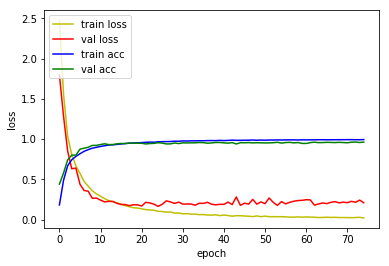

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.2207 - acc: 0.9352
Loss: 0.22074207322495995 Accuracy: 0.9352025

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4660 - acc: 0.1793
Epoch 00001: val_loss improved from inf to 1.80651, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_11_conv_checkpoint/001-1.8065.hdf5
36805/36805 [==============================] - 143s 4ms/sample - loss: 2.4660 - acc: 0.1794 - val_loss: 1.8065 - val_acc: 0.4093
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4661 - acc: 0.5082
Epoch 00002: val_loss improved from 1.80651 to 1.08256, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_11_conv_checkpoint/002-1.0826.hdf5
36805/36805 [==============================] - 122s 3ms/sample - loss: 1.4662 - acc: 0.5082 - val_loss: 1.0826 - val_acc: 0.6557
Epoch 3/500
36800/36805 [===========================

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1015 - acc: 0.9666
Epoch 00024: val_loss did not improve from 0.14437
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.1015 - acc: 0.9666 - val_loss: 0.1550 - val_acc: 0.9541
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9671
Epoch 00025: val_loss improved from 0.14437 to 0.14430, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_11_conv_checkpoint/025-0.1443.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0985 - acc: 0.9671 - val_loss: 0.1443 - val_acc: 0.9583
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0932 - acc: 0.9692
Epoch 00026: val_loss did not improve from 0.14430
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0932 - acc: 0.9692 - val_loss: 0.1519 - val_acc: 0.9564
Epoch 27/500
36800/36805 [============================>.] - E

36800/36805 [============================>.] - ETA: 0s - loss: 0.0353 - acc: 0.9882
Epoch 00053: val_loss did not improve from 0.14430
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0353 - acc: 0.9882 - val_loss: 0.1833 - val_acc: 0.9585
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0311 - acc: 0.9897
Epoch 00054: val_loss did not improve from 0.14430
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0311 - acc: 0.9897 - val_loss: 0.1865 - val_acc: 0.9562
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0296 - acc: 0.9899
Epoch 00055: val_loss did not improve from 0.14430
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0296 - acc: 0.9899 - val_loss: 0.1787 - val_acc: 0.9611
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0345 - acc: 0.9889
Epoch 00056: val_loss did not improve from 0.14430
36805/36805 [=====================

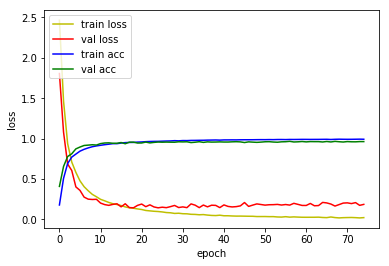

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.1974 - acc: 0.9408
Loss: 0.19742133211990506 Accuracy: 0.94080997

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.5336 - acc: 0.1619
Epoch 00001: val_loss improved from inf to 1.92920, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_12_conv_checkpoint/001-1.9292.hdf5
36805/36805 [==============================] - 148s 4ms/sample - loss: 2.5335 - acc: 0.1620 - val_loss: 1.9292 - val_acc: 0.3764
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7384 - acc: 0.4276
Epoch 00002: val_loss improved from 1.92920 to 1.37821, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_12_conv_checkpoint/002-1.3782.hdf5
36805/36805 [==============================] - 122s 3ms/sample - loss: 1.7384 - acc: 0.4276 - val_loss: 1.3782 - val_acc: 0.5570
Epoch 3/500
36800/36805 [==========================

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1184 - acc: 0.9599
Epoch 00024: val_loss did not improve from 0.15045
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.1184 - acc: 0.9599 - val_loss: 0.1541 - val_acc: 0.9557
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1171 - acc: 0.9607
Epoch 00025: val_loss did not improve from 0.15045
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.1172 - acc: 0.9607 - val_loss: 0.1792 - val_acc: 0.9499
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1112 - acc: 0.9631
Epoch 00026: val_loss did not improve from 0.15045
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.1112 - acc: 0.9631 - val_loss: 0.1623 - val_acc: 0.9509
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1023 - acc: 0.9655
Epoch 00027: val_loss did not improve from 0.15045
36805/36805 [========

Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0344 - acc: 0.9887- ETA: 3s - loss: 0
Epoch 00053: val_loss did not improve from 0.14759
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0344 - acc: 0.9888 - val_loss: 0.2334 - val_acc: 0.9525
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0334 - acc: 0.9890
Epoch 00054: val_loss did not improve from 0.14759
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0334 - acc: 0.9890 - val_loss: 0.2009 - val_acc: 0.9609
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0409 - acc: 0.9869
Epoch 00055: val_loss did not improve from 0.14759
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0409 - acc: 0.9869 - val_loss: 0.1962 - val_acc: 0.9564
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9883
Epoch 00056: val_loss did not improve from 0.14759
36

Epoch 82/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0259 - acc: 0.9917
Epoch 00082: val_loss did not improve from 0.14759
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0259 - acc: 0.9917 - val_loss: 0.2300 - val_acc: 0.9588
Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0194 - acc: 0.9942
Epoch 00083: val_loss did not improve from 0.14759
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0194 - acc: 0.9942 - val_loss: 0.2134 - val_acc: 0.9625
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9928
Epoch 00084: val_loss did not improve from 0.14759
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0246 - acc: 0.9928 - val_loss: 0.1737 - val_acc: 0.9648
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0235 - acc: 0.9929- ETA: 0s - loss: 0.0236 - acc: 0.
Epoch 00085: val_loss did not improve 

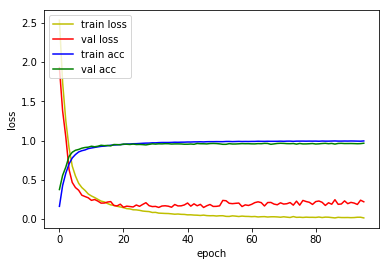

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.2341 - acc: 0.9431
Loss: 0.23413542486603448 Accuracy: 0.9430945

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.3350 - acc: 0.2278
Epoch 00001: val_loss improved from inf to 1.63804, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_13_conv_checkpoint/001-1.6380.hdf5
36805/36805 [==============================] - 154s 4ms/sample - loss: 2.3349 - acc: 0.2278 - val_loss: 1.6380 - val_acc: 0.4489
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3906 - acc: 0.5399
Epoch 00002: val_loss improved from 1.63804 to 0.98090, saving model to model/checkpoint/1D_CNN_custom_conv_3_VGG_pool_2_DO_13_conv_checkpoint/002-0.9809.hdf5
36805/36805 [==============================] - 123s 3ms/sample - loss: 1.3906 - acc: 0.5399 - val_loss: 0.9809 - val_acc: 0.6662
Epoch 3/500
36800/36805 [===========================

36800/36805 [============================>.] - ETA: 0s - loss: 0.0670 - acc: 0.9775
Epoch 00025: val_loss did not improve from 0.16093
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0670 - acc: 0.9775 - val_loss: 0.2377 - val_acc: 0.9415
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0598 - acc: 0.9798
Epoch 00026: val_loss did not improve from 0.16093
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0598 - acc: 0.9798 - val_loss: 0.1966 - val_acc: 0.9506
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0594 - acc: 0.9804
Epoch 00027: val_loss did not improve from 0.16093
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0594 - acc: 0.9804 - val_loss: 0.2307 - val_acc: 0.9443
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0526 - acc: 0.9831
Epoch 00028: val_loss did not improve from 0.16093
36805/36805 [=====================

Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9924
Epoch 00055: val_loss did not improve from 0.16093
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0244 - acc: 0.9924 - val_loss: 0.2403 - val_acc: 0.9541
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9916- ETA: 0s - loss: 0.0276 - acc: 0.9
Epoch 00056: val_loss did not improve from 0.16093
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0275 - acc: 0.9916 - val_loss: 0.1690 - val_acc: 0.9569
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0213 - acc: 0.9939
Epoch 00057: val_loss did not improve from 0.16093
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0213 - acc: 0.9939 - val_loss: 0.2021 - val_acc: 0.9639
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0199 - acc: 0.9937
Epoch 00058: val_loss did not improve

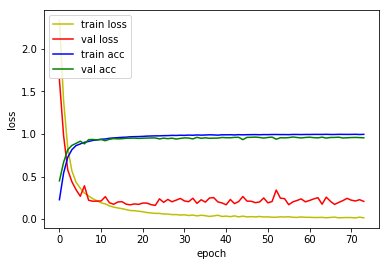

4815/4815 [==============================] - 7s 2ms/sample - loss: 0.2332 - acc: 0.9377
Loss: 0.2332433961741897 Accuracy: 0.9376947



In [10]:
for i in range(3, 14):
    base = '1D_CNN_custom_conv_3_VGG_pool_2_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_conv_3_VGG_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)
    
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_conv_3_VGG_pool_2_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 14):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_conv_3_VGG_pool_2_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_182 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_183 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_184 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_184 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_185 (Conv1D)        

4815/4815 [==============================] - 7s 1ms/sample - loss: 1.0985 - acc: 0.6766
Loss: 1.0985290856623824 Accuracy: 0.6766355

1D_CNN_custom_conv_3_VGG_pool_2_DO_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_206 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_207 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_208 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_208 (Activation

4815/4815 [==============================] - 7s 2ms/sample - loss: 0.6946 - acc: 0.8177
Loss: 0.6946397333749235 Accuracy: 0.8176532

1D_CNN_custom_conv_3_VGG_pool_2_DO_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_232 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_232 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_233 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_233 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_234 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_234 (Activation

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.2968 - acc: 0.9119
Loss: 0.29676123994904513 Accuracy: 0.9119418

1D_CNN_custom_conv_3_VGG_pool_2_DO_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_266 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_266 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_267 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_267 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_268 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_268 (Activati

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.1974 - acc: 0.9408
Loss: 0.19742133211990506 Accuracy: 0.94080997

1D_CNN_custom_conv_3_VGG_pool_2_DO_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_308 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_308 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_309 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_309 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_310 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_310 (Activat

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.2341 - acc: 0.9431
Loss: 0.23413542486603448 Accuracy: 0.9430945

1D_CNN_custom_conv_3_VGG_pool_2_DO_13_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_332 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_332 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_333 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_333 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_334 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_334 (Activati

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.2332 - acc: 0.9377
Loss: 0.2332433961741897 Accuracy: 0.9376947


In [12]:
# log_dir = 'log'
# os.makedirs(log_dir, exist_ok=True)
# base = '1D_CNN_custom_DO_BN'

# with open(path.join(log_dir, base), 'w') as log_file:
for i in range(3, 14):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)

#         log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_conv_3_VGG_pool_2_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_182 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_183 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_184 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_184 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_185 (Conv1D)        

4815/4815 [==============================] - 7s 2ms/sample - loss: 1.7947 - acc: 0.7205
Loss: 1.7947430830011735 Accuracy: 0.7204569

1D_CNN_custom_conv_3_VGG_pool_2_DO_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_206 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_207 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_208 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_208 (Activation

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.9968 - acc: 0.8388
Loss: 0.9967828184892331 Accuracy: 0.83883697

1D_CNN_custom_conv_3_VGG_pool_2_DO_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_232 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_232 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_233 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_233 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_234 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_234 (Activatio

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.3563 - acc: 0.9232
Loss: 0.3563224350397213 Accuracy: 0.9231568

1D_CNN_custom_conv_3_VGG_pool_2_DO_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_266 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_266 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_267 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_267 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_268 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_268 (Activatio

4815/4815 [==============================] - 9s 2ms/sample - loss: 0.2505 - acc: 0.9535
Loss: 0.25049622560374857 Accuracy: 0.9534787

1D_CNN_custom_conv_3_VGG_pool_2_DO_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_308 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_308 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_309 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_309 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_310 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_310 (Activati

4815/4815 [==============================] - 9s 2ms/sample - loss: 0.2741 - acc: 0.9539
Loss: 0.2741406687269973 Accuracy: 0.9538941

1D_CNN_custom_conv_3_VGG_pool_2_DO_13_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_332 (Conv1D)          (None, 16000, 64)         256       
_________________________________________________________________
activation_332 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_333 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_333 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_334 (Conv1D)          (None, 16000, 64)         12352     
_________________________________________________________________
activation_334 (Activatio

4815/4815 [==============================] - 9s 2ms/sample - loss: 0.2973 - acc: 0.9398
Loss: 0.2973006325814997 Accuracy: 0.93977153
